<a href="https://colab.research.google.com/github/npngomg/proj_1/blob/main/ml_for_finmarkets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import numpy as np
import pathlib as pl
import datetime as dt


In [107]:
# Подключение к google drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [108]:
df=pd.read_csv('/content/drive/My Drive/deals_all_opt.csv')

In [109]:
df

,strategy_name,signal_type,instrument,timeframe,direction,entry_date,entry_price,stop_price,exit_date,exit_price,exit_type,volume,commission,profit_abs,profit_eq_pc,start_equity
0,SOL-USDT-SWAP_M30_RISE_FALL_False_True_False_w,RISE_FALL,SOL-USDT-SWAP,M30,Long,2021-04-01 02:30:00,19.613,19.360,2021-04-01 03:00:00,19.623,take_profit,8.510,0.166949,-0.081849,-0.000818,10000.000000
1,ETH-USDT-SWAP_M30_RISE_FALL_False_True_False_w,RISE_FALL,ETH-USDT-SWAP,M30,Short,2021-04-01 03:00:00,1926.370,1944.770,2021-04-01 08:00:00,1944.820,stop,0.208,0.402604,-4.240204,-0.042402,10000.000000
2,ETH-USDT-SWAP_M30_RISE_FALL_False_True_False_w,RISE_FALL,ETH-USDT-SWAP,M30,Long,2021-04-01 04:30:00,1925.620,1915.330,2021-04-01 05:00:00,1915.280,stop,0.372,0.714407,-4.560887,-0.045609,9999.918151
3,SOL-USDT-SWAP_M30_RISE_FALL_False_True_False_w,RISE_FALL,SOL-USDT-SWAP,M30,Long,2021-04-01 04:30:00,20.217,19.510,2021-04-01 05:30:00,20.227,take_profit,3.040,0.061475,-0.031075,-0.000311,9999.918151
4,SOL-USDT-SWAP_H1_RISE_FALL_False_True_False,RISE_FALL,SOL-USDT-SWAP,H1,Long,2021-04-01 05:00:00,20.234,19.510,2021-04-01 10:00:00,19.460,stop,2.790,0.055373,-2.214833,-0.022149,9999.918151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50417,ETH-USDT-SWAP_M30_ENVELOPE_BREAKTHROUGH_True_F...,ENVELOPE_BREAKTHROUGH,ETH-USDT-SWAP,M30,Long,2025-12-04 00:30:00,3203.560,3161.470,2025-12-04 12:30:00,3178.080,exit,6.722,21.448692,-192.725252,-0.029561,651952.298266
50418,ETH-USDT-SWAP_M30_ENVELOPE_BREAKTHROUGH_True_F...,ENVELOPE_BREAKTHROUGH,ETH-USDT-SWAP,M30,Long,2025-12-04 01:00:00,3224.850,3179.670,2025-12-04 05:00:00,3179.620,stop,1.069,3.423189,-51.774059,-0.007941,651952.298266
50419,ETH-USDT-SWAP_M30_STOCH_False_True_True,STOCH,ETH-USDT-SWAP,M30,Short,2025-12-04 06:00:00,3183.640,3292.250,2025-12-04 12:30:00,3178.180,exit,0.526,1.673159,1.198801,0.000184,651770.994313
50420,EGLD-USDT-SWAP_H1_BB_CONFIRMED_False_True_True,BB_CONFIRMED,EGLD-USDT-SWAP,H1,Short,2025-12-04 09:00:00,7.411,7.526,2025-12-04 12:00:00,7.375,exit,1500.000,11.089500,42.910500,0.006467,663524.394032


In [110]:
pd.read_parquet('/content/drive/My Drive/ml_for_finmarkets_data/ADA_USDT_SWAP.parquet')

,open,high,low,close,volume,volCcy,volCcyQuote,confirm
timestamp,,,,,,,,
2022-11-21 16:00:00,0.31003,0.31003,0.30784,0.30845,5989,598900,185013.302,1
2022-11-21 16:15:00,0.30824,0.30862,0.30467,0.30540,16382,1638200,502373.434,1
2022-11-21 16:30:00,0.30531,0.30567,0.30200,0.30464,17234,1723400,523175.232,1
2022-11-21 16:45:00,0.30473,0.30793,0.30473,0.30557,14869,1486900,455555.243,1
2022-11-21 17:00:00,0.30552,0.30593,0.30364,0.30393,7933,793300,241834.617,1
...,...,...,...,...,...,...,...,...
2025-12-03 22:45:00,0.44940,0.45260,0.44940,0.44970,21885.8,2188580,984911.436,1
2025-12-03 23:00:00,0.44970,0.45230,0.44940,0.45200,41256.8,4125680,1860018.298,1
2025-12-03 23:15:00,0.45200,0.45260,0.45050,0.45090,24717.2,2471720,1116665.467,1


In [111]:
df.sort_values(by='exit_date', ascending=True, inplace=True)

In [112]:
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,strategy_name,signal_type,instrument,timeframe,direction,entry_date,entry_price,stop_price,exit_date,exit_price,exit_type,volume,commission,profit_abs,profit_eq_pc,start_equity
0,SOL-USDT-SWAP_M30_RISE_FALL_False_True_False_w,RISE_FALL,SOL-USDT-SWAP,M30,Long,2021-04-01 02:30:00,19.6130,19.3600,2021-04-01 03:00:00,19.6230,take_profit,8.5100,0.166949,-0.081849,-0.000818,10000.000000
2,ETH-USDT-SWAP_M30_RISE_FALL_False_True_False_w,RISE_FALL,ETH-USDT-SWAP,M30,Long,2021-04-01 04:30:00,1925.6200,1915.3300,2021-04-01 05:00:00,1915.2800,stop,0.3720,0.714407,-4.560887,-0.045609,9999.918151
3,SOL-USDT-SWAP_M30_RISE_FALL_False_True_False_w,RISE_FALL,SOL-USDT-SWAP,M30,Long,2021-04-01 04:30:00,20.2170,19.5100,2021-04-01 05:30:00,20.2270,take_profit,3.0400,0.061475,-0.031075,-0.000311,9999.918151
1,ETH-USDT-SWAP_M30_RISE_FALL_False_True_False_w,RISE_FALL,ETH-USDT-SWAP,M30,Short,2021-04-01 03:00:00,1926.3700,1944.7700,2021-04-01 08:00:00,1944.8200,stop,0.2080,0.402604,-4.240204,-0.042402,10000.000000
4,SOL-USDT-SWAP_H1_RISE_FALL_False_True_False,RISE_FALL,SOL-USDT-SWAP,H1,Long,2021-04-01 05:00:00,20.2340,19.5100,2021-04-01 10:00:00,19.4600,stop,2.7900,0.055373,-2.214833,-0.022149,9999.918151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50367,ETH-USDT-SWAP_M30_RISE_FALL_False_True_False_w,RISE_FALL,ETH-USDT-SWAP,M30,Long,2025-12-02 15:30:00,2958.0500,2851.6500,2025-12-04 12:30:00,3178.0800,exit,2.3300,7.148591,505.521309,0.078099,647285.888895
50330,ETH-USDT-SWAP_M30_STOCH_False_True_True,STOCH,ETH-USDT-SWAP,M30,Long,2025-12-01 21:30:00,2782.2600,2699.2600,2025-12-04 12:30:00,3178.0800,exit,0.6770,2.017575,265.952565,0.041463,641415.057612
50332,ETH-USDT-SWAP_M30_MA_CND_CROSS_False_True_True,MA_CND_CROSS,ETH-USDT-SWAP,M30,Long,2025-12-01 23:30:00,2811.3900,2734.4200,2025-12-04 12:30:00,3178.0800,exit,0.5200,1.557262,189.121538,0.029485,641415.057612
50371,OP-USDT-SWAP_M30_MA_CND_CROSS_False_True_True,MA_CND_CROSS,OP-USDT-SWAP,M30,Long,2025-12-02 16:00:00,0.3199,0.3096,2025-12-04 13:00:00,0.3237,exit,2036.0000,0.655185,7.081615,0.001094,647033.171455


In [113]:
# в datetime
df['exit_date'] = pd.to_datetime(df['exit_date'])

# Для недельной доходности
df['week'] = df['exit_date'].dt.isocalendar().week
df['month'] = df['exit_date'].dt.month
df['year'] = df['exit_date'].dt.year

weekly = df.groupby(['year', 'week']).agg(
    total_profit=('profit_abs', 'sum'),
    start_equity=('start_equity', 'first')
)
weekly['weekly_return'] = weekly['total_profit'] / weekly['start_equity'] * 100

monthly = df.groupby(['year', 'month']).agg(
    total_profit=('profit_abs', 'sum'),
    start_equity=('start_equity', 'first')
)
monthly['monthly_return'] = monthly['total_profit'] / monthly['start_equity'] * 100

yearly= df.groupby('year').agg(
    total_profit=('profit_abs', 'sum'),
    start_equity=('start_equity', 'first')
)
yearly['yearly_return'] = yearly['total_profit'] / yearly['start_equity'] * 100


print(monthly['monthly_return'], yearly['yearly_return'])
print('средний недельный доход ', weekly['weekly_return'].mean(), ' стандартное отклонение ', weekly['weekly_return'].std())
print('средний месячный доход ', monthly['monthly_return'].mean(), ' стандартное отклонение ', monthly['monthly_return'].std())
print('средний годовой доход ', yearly['yearly_return'].mean(), ' стандартное отклонение ', yearly['yearly_return'].std())

year  month
2021  4         1.203945
      5         9.166071
      6         7.872662
      7         4.463698
      8         8.878771
      9        11.904234
      10        6.386849
      11        1.040490
      12        6.432781
2022  1        19.315729
      2         7.497450
      3         4.785248
      4         6.313920
      5        12.873984
      6        12.901721
      7         7.284258
      8         6.714236
      9         0.656411
      10        7.265469
      11        2.900866
      12        7.844761
2023  1        19.718141
      2         0.283269
      3         7.680805
      4         7.247104
      5        -0.855365
      6        14.165537
      7         1.071367
      8        16.482627
      9        -7.032468
      10       16.614417
      11       -2.515809
      12        9.334737
2024  1         6.353278
      2        11.852777
      3         3.604362
      4        10.505578
      5         7.984806
      6        12.010186
      7      

In [114]:
weekly_trades = df.groupby(['year', 'week']).size()
print('количество сделок в неделю', weekly_trades.mean())

monthly_trades = df.groupby(['year', 'month']).size()
print('количество сделок в месяц', monthly_trades.mean())

yearly_trades = df.groupby('year').size()
print('количесвто сделок в год', yearly_trades.mean())


количество сделок в неделю 205.80408163265307
количество сделок в месяц 884.5964912280701
количесвто сделок в год 10084.4


In [115]:
# Процент положительных сделок
positive_pct = (df['profit_abs'] > 0).sum() / len(df) * 100
print('Процент положительных сделок', positive_pct)

Процент положительных сделок 39.490698504620994


In [116]:

long_pct = (df['direction'] == 'Long').sum() / len(df) * 100
print('Процент сделок на покупку', long_pct)

short_pct = (df['direction'] == 'Short').sum() / len(df) * 100
print('Процент сделок на продажу',  short_pct)

Процент сделок на покупку 46.313117290071794
Процент сделок на продажу 53.686882709928206


In [117]:

pos_pnl_mean = df[df['profit_eq_pc'] > 0]['profit_eq_pc'].mean()
print('Средняя положительная доходность', pos_pnl_mean)

neg_pnl_mean = df[df['profit_eq_pc'] < 0]['profit_eq_pc'].mean()
print('Средняя отрицательная доходность',  neg_pnl_mean)

Средняя положительная доходность 0.06238721124030718
Средняя отрицательная доходность -0.025622900012108096


In [118]:

max_profit = df[df['profit_eq_pc'] > 0]['profit_eq_pc'].max()
print('Максимальная прибыльная сделка', max_profit)

max_loss = df[df['profit_eq_pc'] < 0]['profit_eq_pc'].min()
print('Максимальгная убыточная сделка',  max_loss)

Максимальная прибыльная сделка 1.4254618771650245
Максимальгная убыточная сделка -1.4437894987983595


In [119]:
print(df)

                                        strategy_name   signal_type  \
0      SOL-USDT-SWAP_M30_RISE_FALL_False_True_False_w     RISE_FALL   
2      ETH-USDT-SWAP_M30_RISE_FALL_False_True_False_w     RISE_FALL   
3      SOL-USDT-SWAP_M30_RISE_FALL_False_True_False_w     RISE_FALL   
1      ETH-USDT-SWAP_M30_RISE_FALL_False_True_False_w     RISE_FALL   
4         SOL-USDT-SWAP_H1_RISE_FALL_False_True_False     RISE_FALL   
...                                               ...           ...   
50367  ETH-USDT-SWAP_M30_RISE_FALL_False_True_False_w     RISE_FALL   
50330         ETH-USDT-SWAP_M30_STOCH_False_True_True         STOCH   
50332  ETH-USDT-SWAP_M30_MA_CND_CROSS_False_True_True  MA_CND_CROSS   
50371   OP-USDT-SWAP_M30_MA_CND_CROSS_False_True_True  MA_CND_CROSS   
50364     BTC-USDT-SWAP_M15_RISE_FALL_False_True_True     RISE_FALL   

          instrument timeframe direction           entry_date  entry_price  \
0      SOL-USDT-SWAP       M30      Long  2021-04-01 02:30:00      19

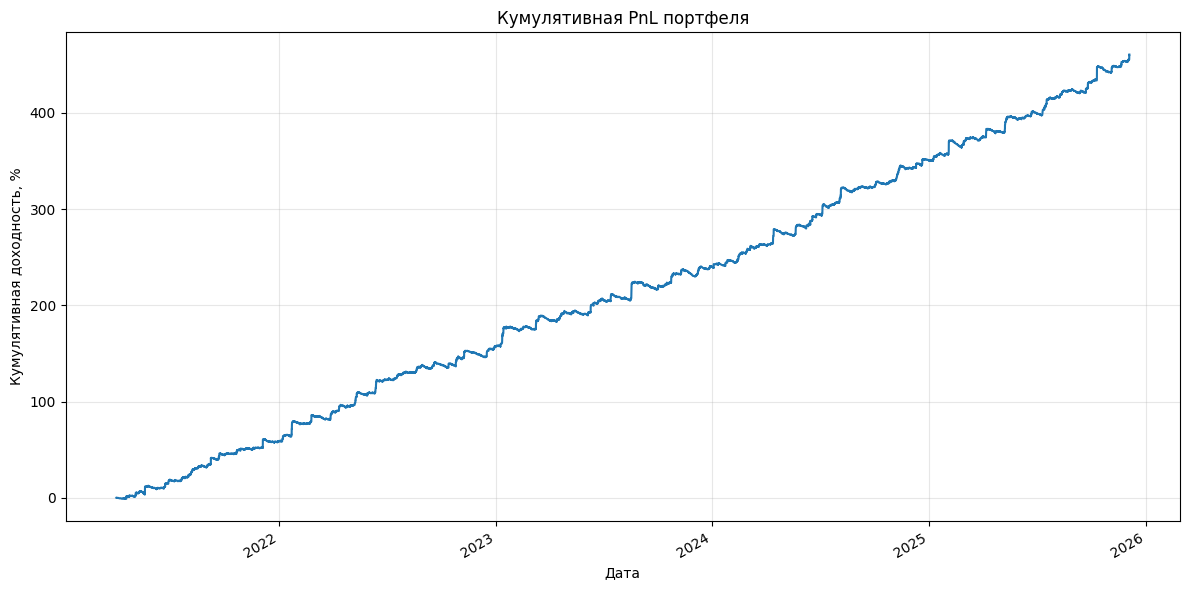

In [120]:
import matplotlib.pyplot as plt
df = df.set_index('exit_date')

# Сортируем по дате (на всякий случай)
df = df.sort_index()

# Рассчитываем кумулятивную доходность
df['cumpnl'] = df['profit_eq_pc'].cumsum()

# Строим график с датами на оси X
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cumpnl'])
plt.title('Кумулятивная PnL портфеля')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная доходность, %')
plt.grid(True, alpha=0.3)

# Форматируем ось X для лучшей читаемости
plt.gcf().autofmt_xdate()  # Автоматический поворот дат
plt.tight_layout()
plt.show()

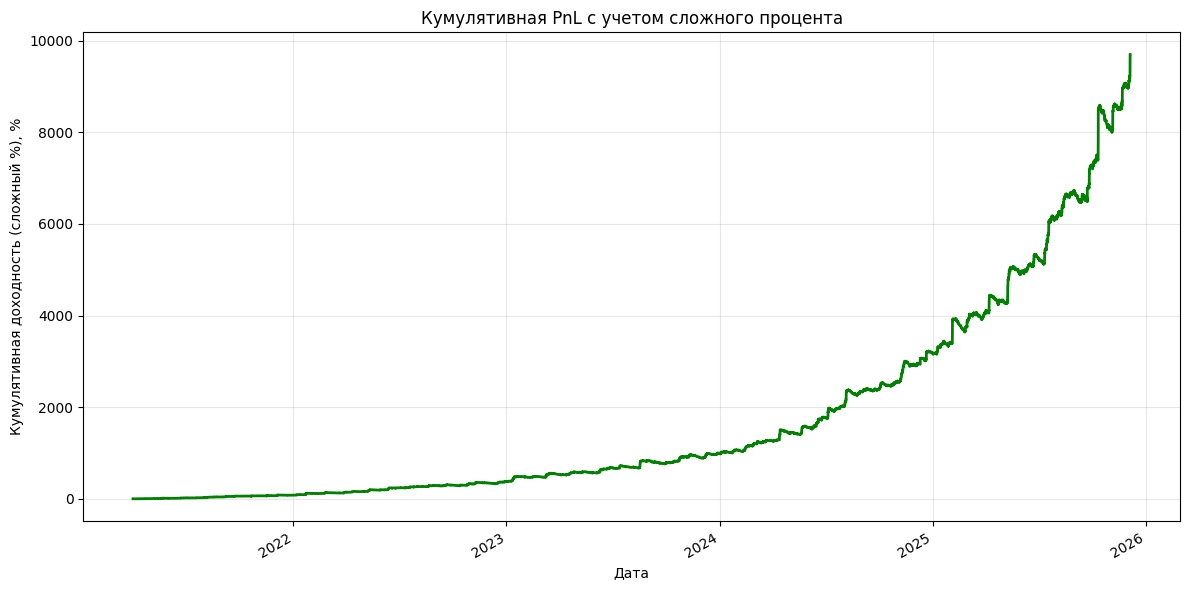

In [121]:
# Рассчитываем кумулятивную доходность с учетом сложного процента
multipliers = 1 + df['profit_eq_pc'] / 100
df['compound_cumpnl'] = (multipliers.cumprod() - 1) * 100

# Строим график с датами на оси X
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['compound_cumpnl'], color='green', linewidth=2)
plt.title('Кумулятивная PnL с учетом сложного процента')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная доходность (сложный %), %')
plt.grid(True, alpha=0.3)

# Форматируем ось X для лучшей читаемости дат
plt.gcf().autofmt_xdate()  # Автоматический поворот дат
plt.tight_layout()
plt.show()

Тип индекса: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Имя индекса: exit_date
Доступные года: [2021, 2022, 2023, 2024, 2025]


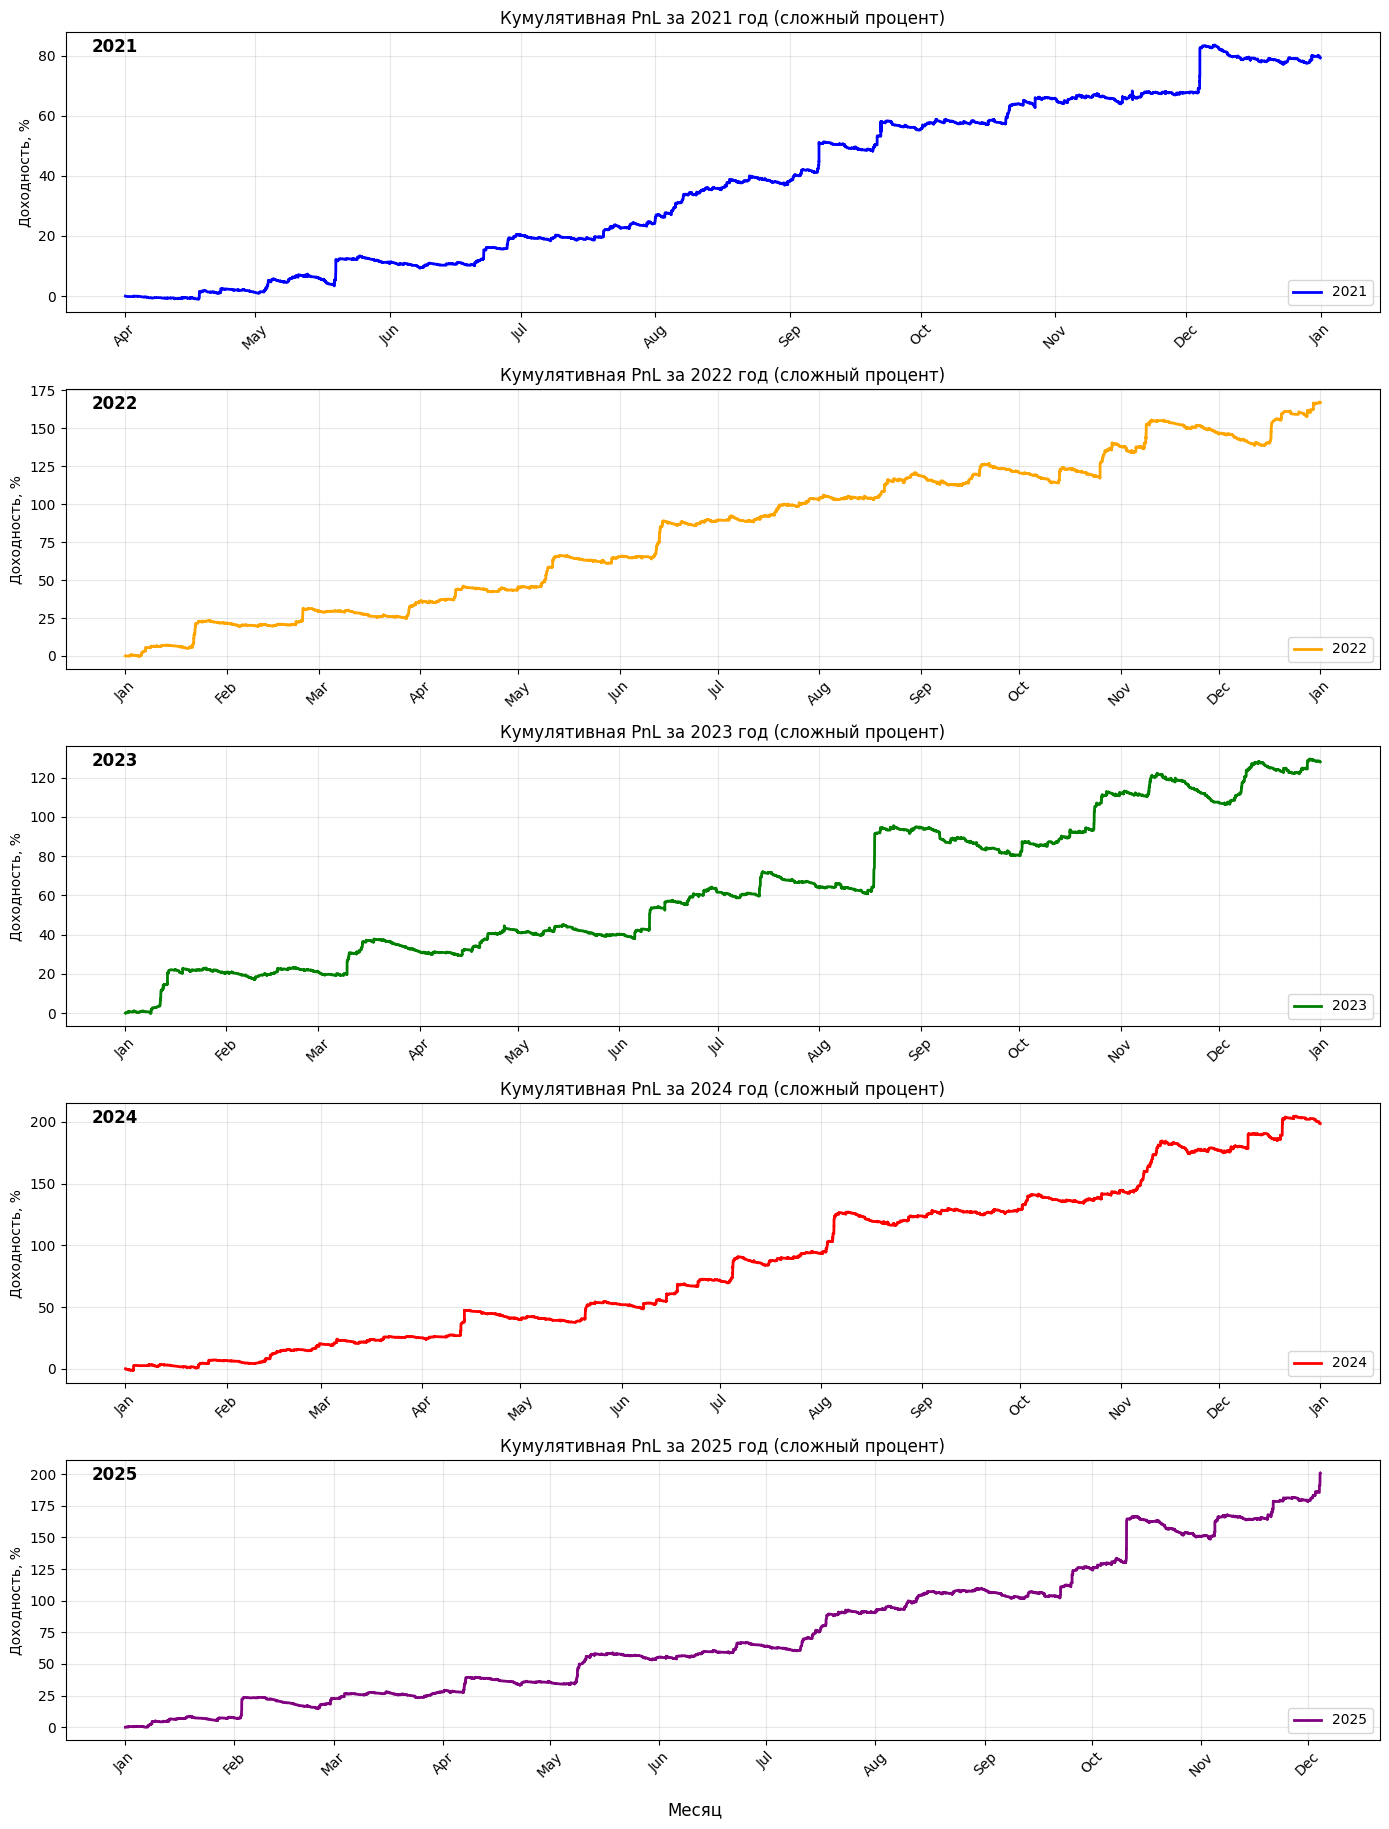

In [122]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Проверяем, является ли индекс DatetimeIndex
print(f"Тип индекса: {type(df.index)}")
print(f"Имя индекса: {df.index.name}")

# Получаем уникальные года из индекса
years = sorted(df.index.year.unique())
print(f"Доступные года: {years}")

colors = ['blue', 'orange', 'green', 'red', 'purple']

# Создаем subplot для каждого года
fig, axes = plt.subplots(len(years), 1, figsize=(14, 4*len(years)))

# Если только один год, axes не будет массивом
if len(years) == 1:
    axes = [axes]

# Проходим по каждому году
for i, year in enumerate(years):
    # Фильтруем данные за год используя индекс
    year_mask = df.index.year == year
    year_data = df[year_mask].copy()

    if len(year_data) > 0:
        # Рассчитываем кумулятивную доходность с учетом сложного процента
        multipliers = 1 + year_data['profit_eq_pc'] / 100
        cum = (multipliers.cumprod() - 1) * 100

        # Строим график (используем индекс как ось X)
        axes[i].plot(year_data.index, cum.values,
                    label=f'{year}',
                    color=colors[i % len(colors)],
                    linewidth=2)

        axes[i].set_title(f'Кумулятивная PnL за {year} год (сложный процент)')
        axes[i].set_ylabel('Доходность, %')
        axes[i].grid(True, alpha=0.3)
        axes[i].legend()

        # Форматируем даты на оси X (только месяц)
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Сокращенные названия месяцев
        axes[i].xaxis.set_major_locator(mdates.MonthLocator())

        # Поворачиваем подписи дат для лучшей читаемости
        plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45)

        # Добавляем подпись года
        axes[i].text(0.02, 0.98, f'{year}',
                    transform=axes[i].transAxes,
                    fontsize=12, fontweight='bold',
                    verticalalignment='top')
    else:
        axes[i].text(0.5, 0.5, f'Нет данных за {year} год',
                    ha='center', va='center', transform=axes[i].transAxes)
        axes[i].set_title(f'{year} год')

# Общая подпись оси X
fig.text(0.5, 0.04, 'Месяц', ha='center', fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Оставляем место для общей подписи
plt.show()

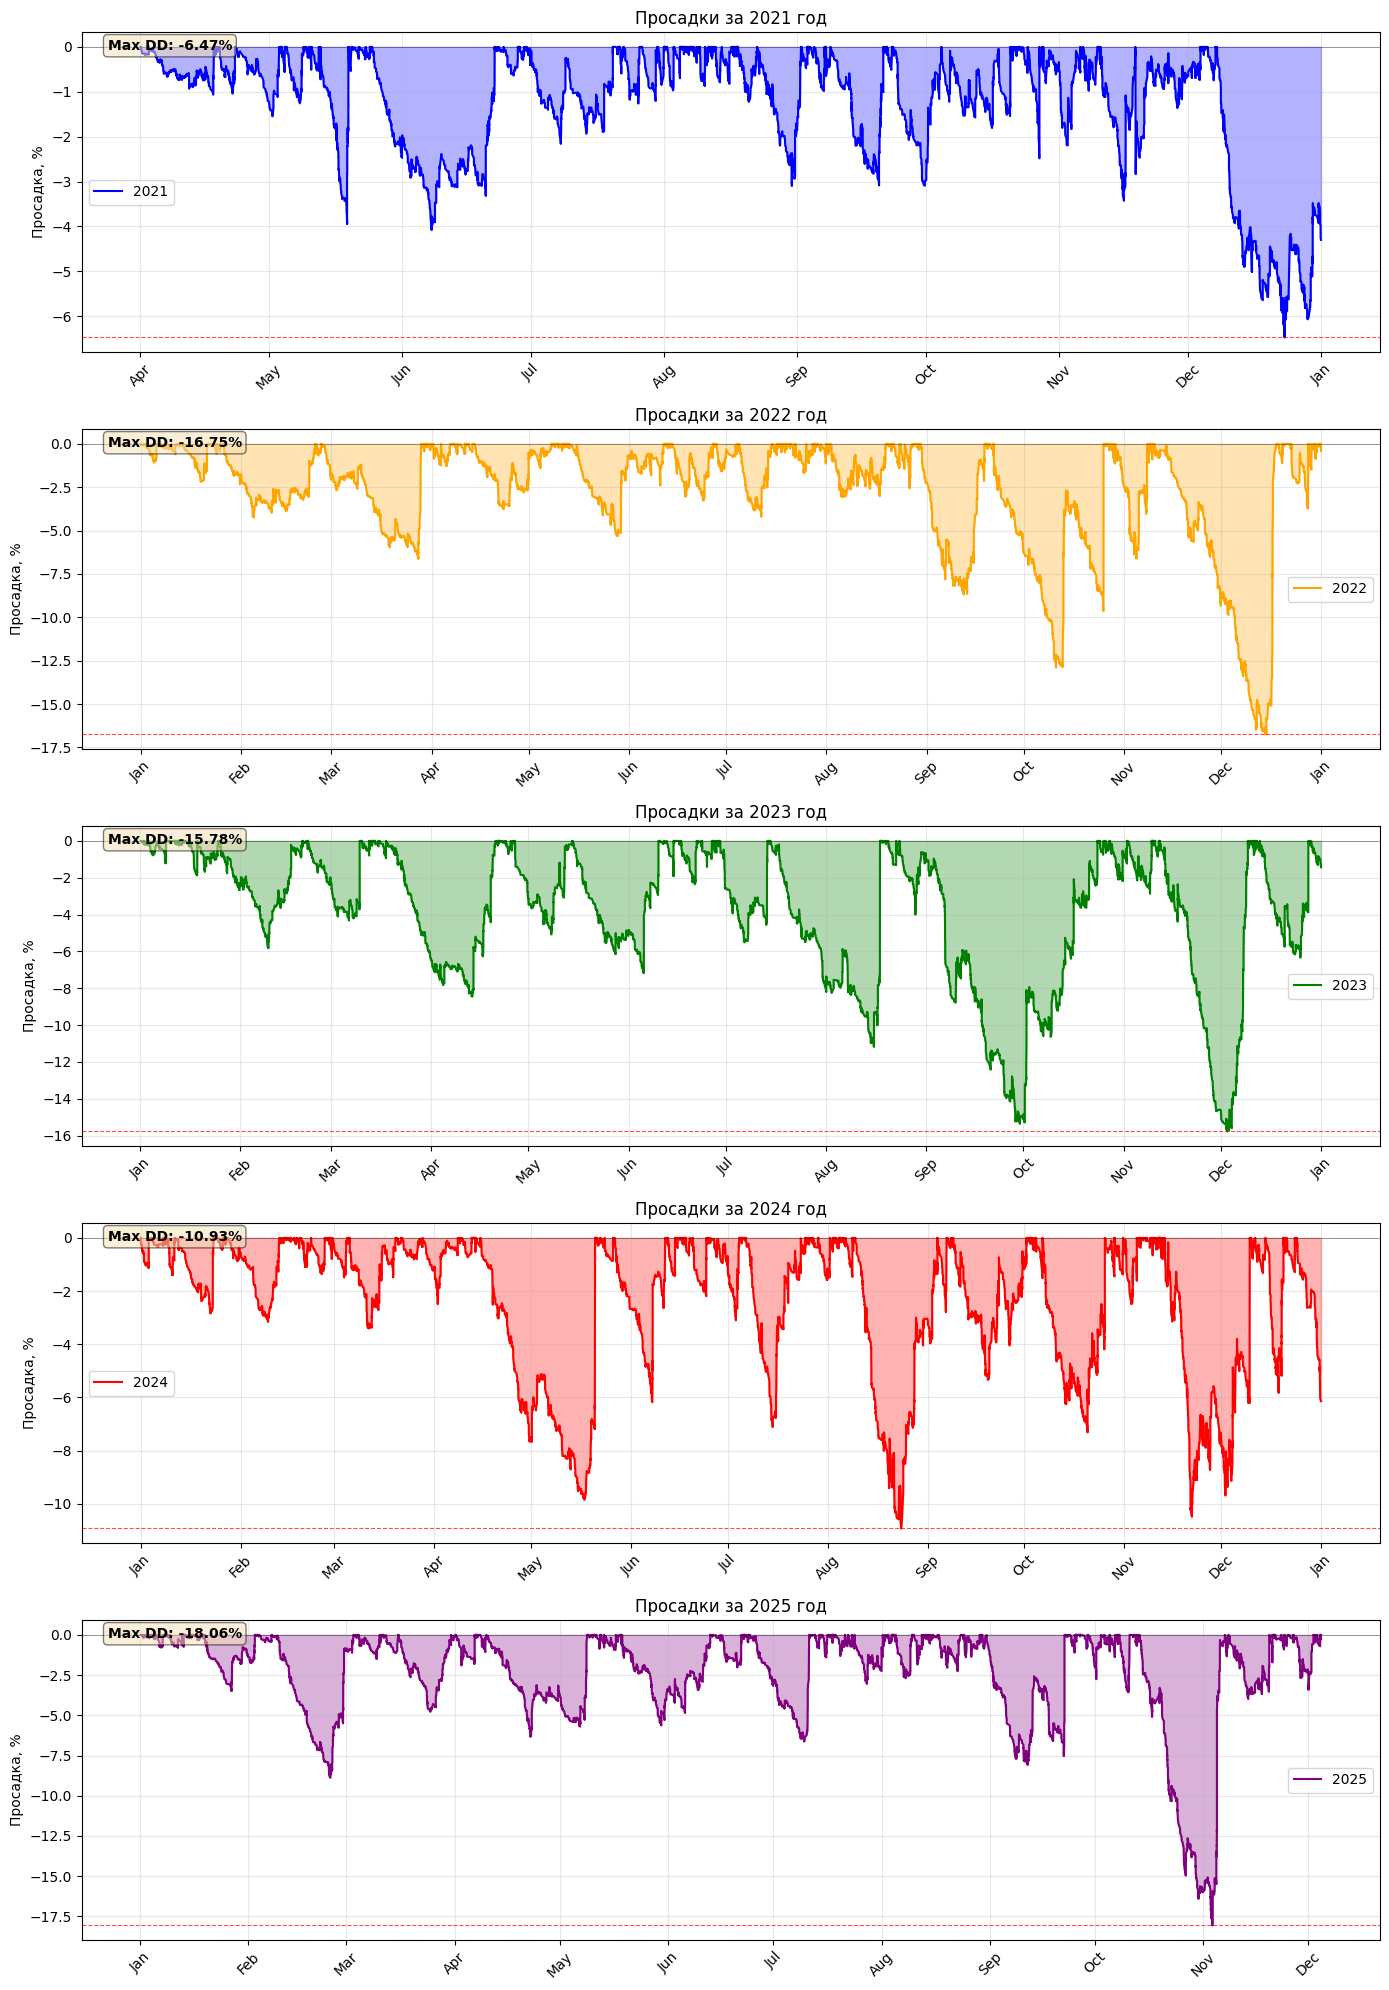

In [123]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Проверяем тип индекса и получаем года
if isinstance(df.index, pd.DatetimeIndex):
    # Используем индекс для получения года
    years = sorted(df.index.year.unique())
else:
    # Используем колонку exit_date
    years = sorted(df['exit_date'].dt.year.unique())

colors = ['blue', 'orange', 'green', 'red', 'purple']

# Создаем subplot для каждого года
fig, axes = plt.subplots(len(years), 1, figsize=(14, 4*len(years)))

# Если только один год, axes не будет массивом
if len(years) == 1:
    axes = [axes]

# Проходим по каждому году
for i, year in enumerate(years):
    # Фильтруем данные за год
    if isinstance(df.index, pd.DatetimeIndex):
        year_mask = df.index.year == year
        year_data = df[year_mask].copy()
    else:
        year_data = df[df['exit_date'].dt.year == year].copy()

    if len(year_data) > 0:
        # Рассчитываем кумулятивную доходность с учетом сложного процента
        multipliers = 1 + year_data['profit_eq_pc'] / 100
        cum_returns = (multipliers.cumprod() - 1) * 100

        # Рассчитываем просадку
        # Вариант 1: Традиционная просадка (отрицательные значения)
        running_max = cum_returns.cummax()
        drawdown = cum_returns - running_max  # Отрицательные значения = просадка

        # Вариант 2: Абсолютная просадка (положительные значения)
        # running_max = cum_returns.cummax()
        # drawdown = running_max - cum_returns  # Положительные значения = просадка

        # Строим график просадки
        if isinstance(df.index, pd.DatetimeIndex):
            x_data = year_data.index
        else:
            x_data = year_data['exit_date']

        axes[i].fill_between(x_data, drawdown, 0,
                           alpha=0.3, color=colors[i % len(colors)])
        axes[i].plot(x_data, drawdown,
                    label=f'{year}',
                    color=colors[i % len(colors)],
                    linewidth=1.5)

        axes[i].set_title(f'Просадки за {year} год')
        axes[i].set_ylabel('Просадка, %')
        axes[i].grid(True, alpha=0.3)
        axes[i].legend()

        # Добавляем горизонтальную линию на нуле
        axes[i].axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)

        # Находим и отмечаем максимальную просадку
        max_dd = drawdown.min()
        if max_dd < 0:
            max_dd_idx = drawdown.idxmin()
            axes[i].axhline(y=max_dd, color='red', linestyle='--', alpha=0.7, linewidth=0.8)
            axes[i].text(0.02, 0.98, f'Max DD: {max_dd:.2f}%',
                        transform=axes[i].transAxes,
                        fontsize=10, fontweight='bold',
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

        # Форматируем ось X
        if isinstance(x_data, pd.DatetimeIndex):
            axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Месяцы
            axes[i].xaxis.set_major_locator(mdates.MonthLocator())
            plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45)
    else:
        axes[i].text(0.5, 0.5, f'Нет данных за {year} год',
                    ha='center', va='center', transform=axes[i].transAxes)
        axes[i].set_title(f'{year} год')

plt.tight_layout()
plt.show()

In [124]:
import numpy as np

# 1. Рассчитываем кумулятивный рост в разах
cumulative_growth = (1 + df['profit_eq_pc'] / 100).cumprod()

# 2. Находим бегущий максимум
running_max = cumulative_growth.cummax()

# 3. Рассчитываем просадку в ОТНОСИТЕЛЬНЫХ процентах
drawdown_relative = (running_max - cumulative_growth) / running_max * 100

# 4. Находим максимальную просадку
max_drawdown_relative = drawdown_relative.max()
max_drawdown_absolute = (running_max - cumulative_growth).max() * 100

print(f"Максимальная относительная просадка: {max_drawdown_relative:.2f}%")
print(f"Максимальная абсолютная просадка: {max_drawdown_absolute:.2f}%")

Максимальная относительная просадка: 7.85%
Максимальная абсолютная просадка: 588.31%


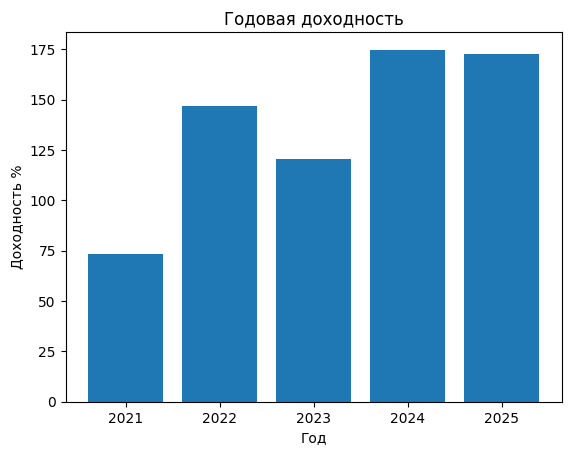

In [125]:
# Гистограмма годовой доходности
plt.bar(yearly.index, yearly['yearly_return'])
plt.xlabel('Год')
plt.ylabel('Доходность %')
plt.title('Годовая доходность')
plt.show()

Индекс monthly: ['year', 'month']
Уровни индекса: 2


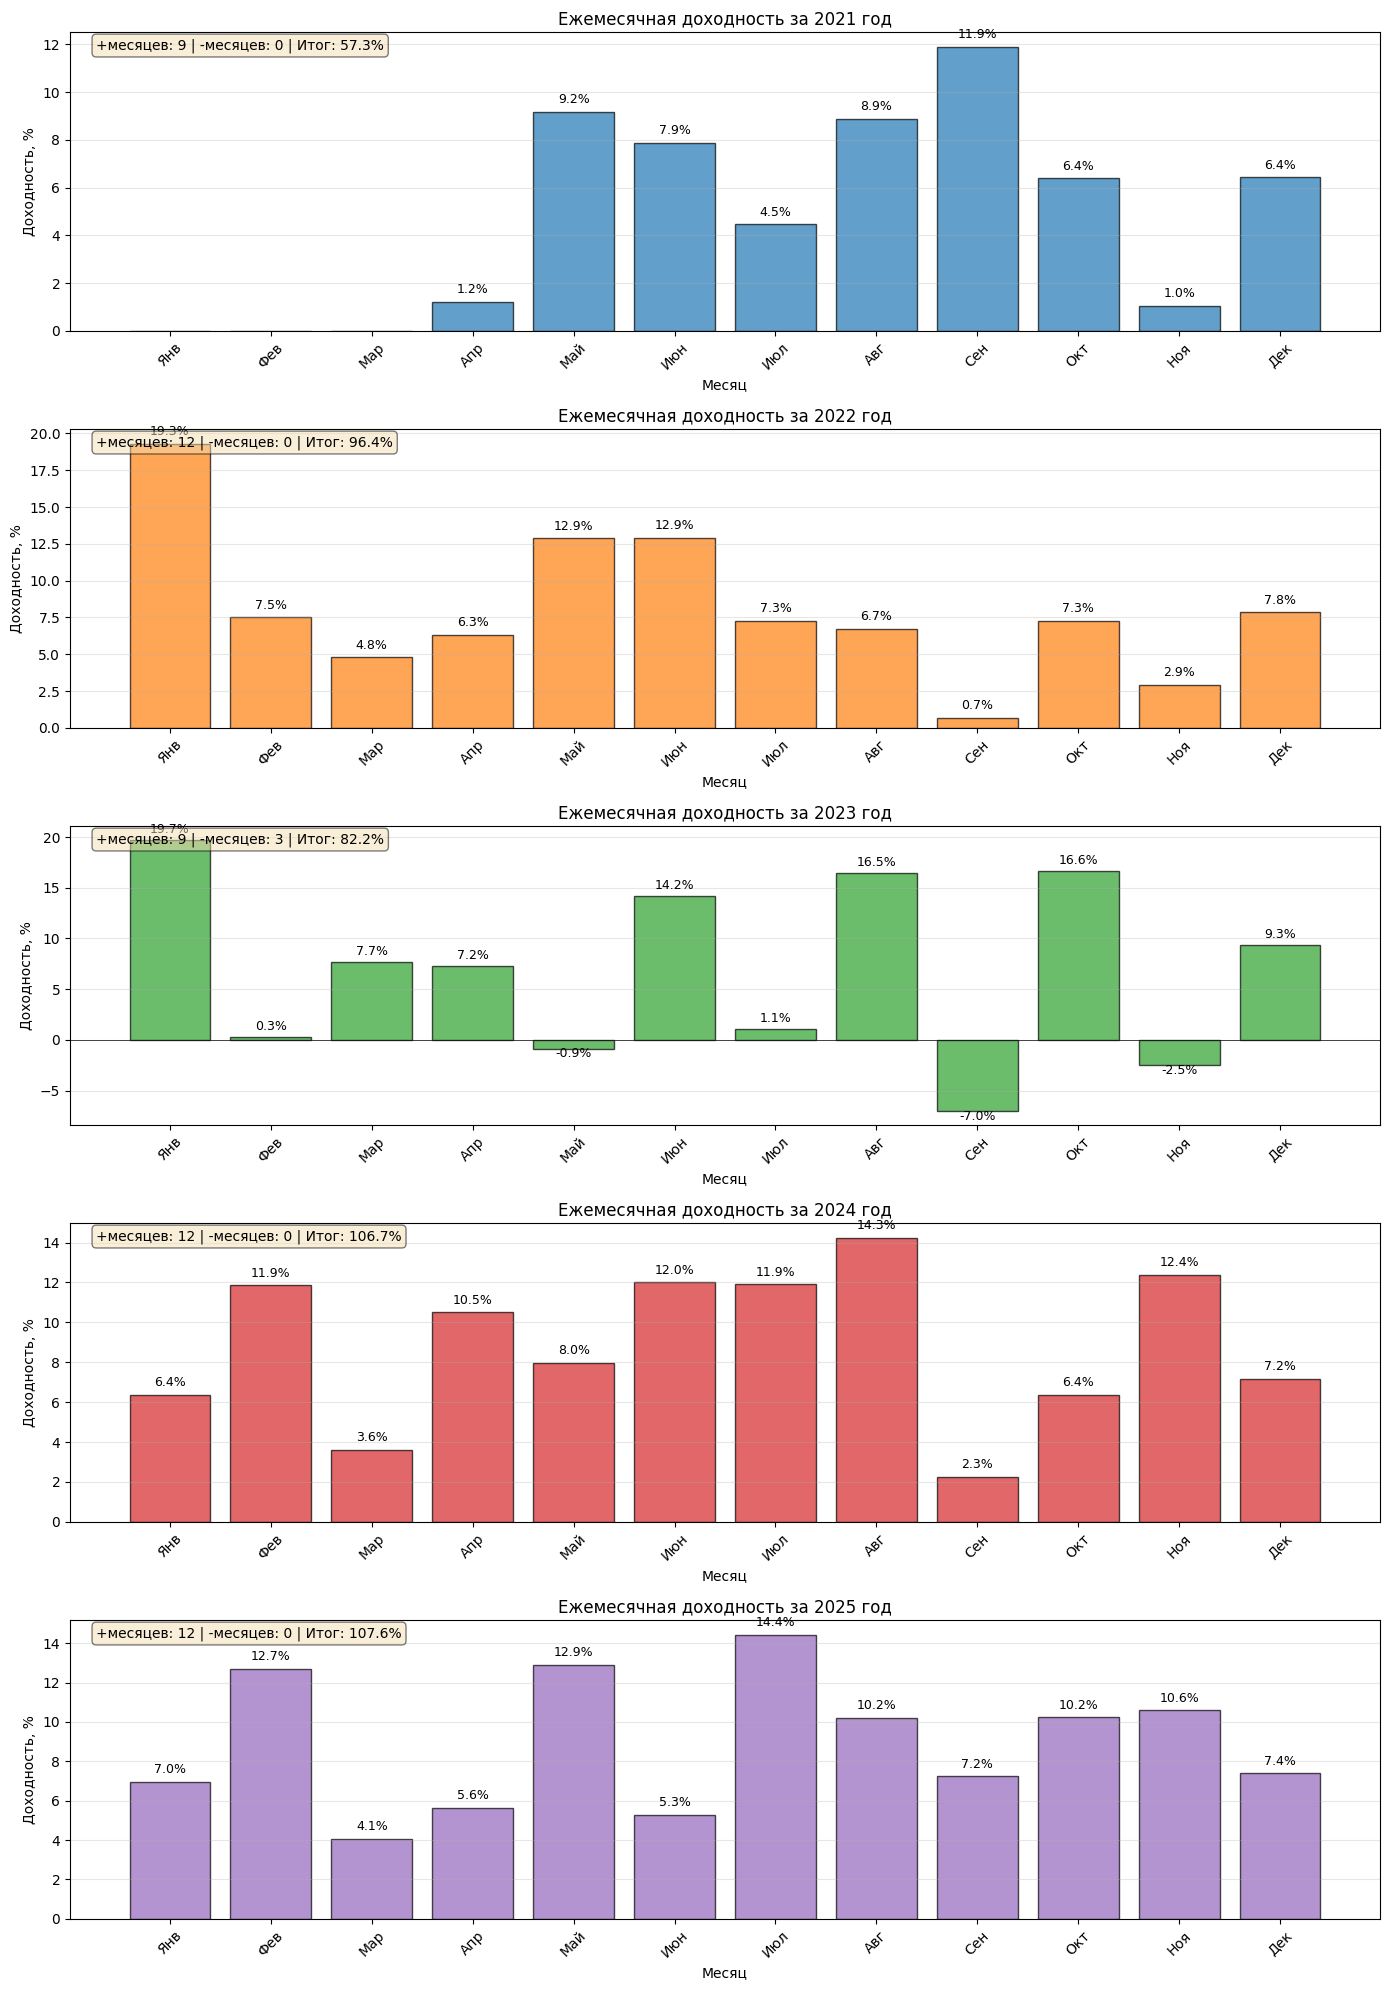

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Проверяем структуру monthly
print(f"Индекс monthly: {monthly.index.names}")
print(f"Уровни индекса: {monthly.index.nlevels}")

# Извлекаем года из индекса
if monthly.index.nlevels == 2:
    # MultiIndex (year, month)
    years = sorted(monthly.index.get_level_values(0).unique())
else:
    # Обычный индекс
    years = sorted(monthly.index.unique())

# Создаем отдельные графики для каждого года
fig, axes = plt.subplots(len(years), 1, figsize=(14, 4*len(years)))

# Если только один год, axes не будет массивом
if len(years) == 1:
    axes = [axes]

# Месяцы для оси X
months = range(1, 13)
month_names = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн',
              'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']

# Проходим по каждому году
for i, year in enumerate(years):
    # Извлекаем данные за год
    if monthly.index.nlevels == 2:
        # Для MultiIndex
        if year in monthly.index.get_level_values(0):
            year_data = monthly.loc[year]
        else:
            year_data = pd.Series([0]*12, index=range(1, 13))
    else:
        # Для обычного индекса
        if year in monthly.index:
            year_data = monthly.loc[[year]]
        else:
            year_data = pd.Series([0]*12, index=range(1, 13))

    # Если year_data - DataFrame, извлекаем нужную колонку
    if isinstance(year_data, pd.DataFrame):
        # Проверяем наличие колонки
        if 'monthly_return' in year_data.columns:
            returns = year_data['monthly_return']
        else:
            # Если нет такой колонки, берем первую
            returns = year_data.iloc[:, 0]
    elif isinstance(year_data, pd.Series):
        returns = year_data
    else:
        returns = pd.Series([0]*12, index=range(1, 13))

    # Реиндексируем по всем месяцам, заполняем пропуски нулями
    returns_full = returns.reindex(months, fill_value=0)

    # Строим столбчатую диаграмму
    axes[i].bar(months, returns_full.values,
               color=plt.cm.tab10(i % 10),
               alpha=0.7,
               edgecolor='black')

    # Добавляем значения над столбцами
    for month, value in zip(months, returns_full.values):
        if value != 0:
            axes[i].text(month, value + (0.02 * max(returns_full.values) if value >= 0 else -0.02 * min(returns_full.values)),
                        f'{value:.1f}%',
                        ha='center', va='bottom' if value >= 0 else 'top',
                        fontsize=9)

    # Настраиваем график
    axes[i].set_title(f'Ежемесячная доходность за {year} год')
    axes[i].set_xlabel('Месяц')
    axes[i].set_ylabel('Доходность, %')
    axes[i].set_xticks(months)
    axes[i].set_xticklabels(month_names, rotation=45)
    axes[i].grid(True, alpha=0.3, axis='y')

    # Добавляем горизонтальную линию на нуле
    axes[i].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

    # Подсчитываем статистику
    positive_months = (returns_full > 0).sum()
    negative_months = (returns_full < 0).sum()
    total_return = returns_full.sum()

    # Добавляем статистику на график
    stats_text = f'+месяцев: {positive_months} | -месяцев: {negative_months} | Итог: {total_return:.1f}%'
    axes[i].text(0.02, 0.98, stats_text,
                transform=axes[i].transAxes,
                fontsize=10,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

In [127]:
# Уникальные стратегии
strategies = df['strategy_name'].nunique()
print(f'Стратегий: {strategies}')

Стратегий: 93


In [128]:
def analyze_strategy_working(strat_df):
    # Используем как есть, без сложных проверок
    df_work = strat_df.copy()

    # Если есть индекс с датами, используем его
    if isinstance(df_work.index, pd.DatetimeIndex):
        # Сортируем по индексу
        df_work = df_work.sort_index()
        # Рассчитываем статистику
        cum_growth = (1 + df_work['profit_eq_pc']/100).cumprod()
        total_return = (cum_growth.iloc[-1] - 1) * 100
        running_max = cum_growth.cummax()
        max_dd = ((running_max - cum_growth) / running_max * 100).max()
    else:
        # Простая сумма
        total_return = df_work['profit_eq_pc'].sum()
        max_dd = 0  # Упрощенно

    n_trades = len(df_work)
    recovery = abs(total_return / max_dd) if max_dd > 0 else np.inf

    # Sharpe/Sortino (упрощенно)
    returns = df_work['profit_eq_pc'] / 100
    if len(returns) > 1 and returns.std() > 0:
        sharpe = (returns.mean() / returns.std()) * np.sqrt(min(len(returns), 252))
        neg_returns = returns[returns < 0]
        if len(neg_returns) > 1:
            sortino = (returns.mean() / neg_returns.std()) * np.sqrt(min(len(returns), 252))
        else:
            sortino = sharpe
    else:
        sharpe = sortino = 0

    return pd.Series({
        'trades': n_trades,
        'total_return': total_return,
        'max_dd': max_dd,
        'recovery': recovery,
        'sharpe': sharpe,
        'sortino': sortino
    })

# Работает всегда!
portfolio_working = analyze_strategy_working(df)
print("\nРабочие показатели портфеля:")
print(portfolio_working)


Рабочие показатели портфеля:
trades          50422.000000
total_return     9698.978991
max_dd              7.854993
recovery         1234.753289
sharpe              1.628525
sortino             7.272524
dtype: float64


In [129]:
# Применяем функцию ко всем стратегиям
strategy_results = df.groupby('strategy_name', group_keys=False).apply(
    lambda x: analyze_strategy_working(x)
)

# Добавляем портфель в результаты
portfolio_df = pd.DataFrame([portfolio_working])
portfolio_df.index = ['PORTFOLIO_TOTAL']

# Объединяем
all_results = pd.concat([strategy_results, portfolio_df])

print("ВСЕ РЕЗУЛЬТАТЫ (стратегии + портфель):")
print("="*100)

# Форматируем вывод
cols_to_show = ['trades', 'total_return', 'max_dd', 'recovery', 'sharpe', 'sortino']
formatted = all_results[cols_to_show].round({
    'trades': 0,
    'total_return': 1,
    'max_dd': 2,
    'recovery': 1,
    'sharpe': 3,
    'sortino': 3
})

# Показываем первые 10 стратегий + портфель
print("Первые 10 стратегий (по доходности):")
print(formatted.sort_values('total_return', ascending=False).head(10))

print("\n" + "="*100)
print("ПОКАЗАТЕЛИ ПОРТФЕЛЯ:")
print(formatted.loc['PORTFOLIO_TOTAL'].to_frame().T)

print("\n" + "="*100)
print("СТАТИСТИКА ПО ВСЕМ СТРАТЕГИЯМ:")
stats = strategy_results[cols_to_show[1:]].describe().round(3)
print(stats)

ВСЕ РЕЗУЛЬТАТЫ (стратегии + портфель):
Первые 10 стратегий (по доходности):
                                                    trades  total_return  \
PORTFOLIO_TOTAL                                    50422.0        9699.0   
ETH-USDT-SWAP_H1_HHV_LLV_False_True_False            845.0          22.0   
ETH-USDT-SWAP_H1_HHV_LLV_False_True_False_w          830.0          21.9   
ETH-USDT-SWAP_H1_HHV_LLV_False_True_True_w           672.0          21.3   
AVAX-USDT-SWAP_M30_HHV_LLV_False_True_True_w        1224.0          15.9   
ETH-USDT-SWAP_H1_MA_CND_CROSS_False_True_True_w      637.0          14.9   
ETH-USDT-SWAP_H4_HHV_LLV_False_True_False            476.0          13.1   
AVAX-USDT-SWAP_M30_MA_CND_CROSS_False_True_True_w   1208.0          12.7   
ETH-USDT-SWAP_H1_MA_CND_CROSS_False_True_True        691.0          12.5   
ONT-USDT-SWAP_H1_EMA_CROSS_False_True_False_w        290.0          11.6   

                                                   max_dd  recovery  sharpe  \
PORTFOLI

/tmp/ipython-input-414150986.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strategy_results = df.groupby('strategy_name', group_keys=False).apply(


In [130]:

if 'df' in locals() or 'df' in globals():
    unique_pairs = df['instrument'].unique()
    print(f"📋 Уникальных торговых пар в портфеле: {len(unique_pairs)}")
    print("Список:", list(unique_pairs)[:10])  # Покажем первые 10
else:
    print("❌ DataFrame 'df' не найден. Загрузите ваши данные сделок.")

📋 Уникальных торговых пар в портфеле: 21
Список: ['SOL-USDT-SWAP', 'ETH-USDT-SWAP', 'AAVE-USDT-SWAP', 'AVAX-USDT-SWAP', 'DOGE-USDT-SWAP', 'EGLD-USDT-SWAP', 'BTC-USDT-SWAP', 'CFX-USDT-SWAP', 'XLM-USDT-SWAP', 'UMA-USDT-SWAP']


In [131]:
import pandas as pd

def prep_trades(df):
    tr = df.copy()

    # если даты вдруг в индексе
    if "entry_date" not in tr.columns and "entry_date" in getattr(tr.index, "names", []):
        tr["entry_date"] = tr.index.get_level_values("entry_date")
    if "exit_date" not in tr.columns and "exit_date" in getattr(tr.index, "names", []):
        tr["exit_date"] = tr.index.get_level_values("exit_date")

    # альтернативные названия
    rename_map = {}
    if "entry_time" in tr.columns and "entry_date" not in tr.columns:
        rename_map["entry_time"] = "entry_date"
    if "exit_time" in tr.columns and "exit_date" not in tr.columns:
        rename_map["exit_time"] = "exit_date"

    if rename_map:
        tr = tr.rename(columns=rename_map)

    need = [
        "instrument", "direction", "entry_date", "exit_date",
        "entry_price", "volume", "commission",
        "profit_eq_pc", "start_equity"
    ]
    missing = [c for c in need if c not in tr.columns]
    if missing:
        raise KeyError(f"Не хватает колонок: {missing}. Есть: {list(tr.columns)}")

    tr["entry_date"] = pd.to_datetime(tr["entry_date"])
    tr["exit_date"]  = pd.to_datetime(tr["exit_date"])
    return tr

tr = prep_trades(df)
tr.head()


,strategy_name,signal_type,instrument,timeframe,direction,entry_date,entry_price,stop_price,exit_price,exit_type,...,commission,profit_abs,profit_eq_pc,start_equity,week,month,year,cumpnl,compound_cumpnl,exit_date
exit_date,,,,,,,,,,,,,,,,,,,,,
2021-04-01 03:00:00,SOL-USDT-SWAP_M30_RISE_FALL_False_True_False_w,RISE_FALL,SOL-USDT-SWAP,M30,Long,2021-04-01 02:30:00,19.613,19.36,19.623,take_profit,...,0.166949,-0.081849,-0.000818,10000.000000,13,4,2021,-0.000818,-0.000818,2021-04-01 03:00:00
2021-04-01 05:00:00,ETH-USDT-SWAP_M30_RISE_FALL_False_True_False_w,RISE_FALL,ETH-USDT-SWAP,M30,Long,2021-04-01 04:30:00,1925.620,1915.33,1915.280,stop,...,0.714407,-4.560887,-0.045609,9999.918151,13,4,2021,-0.046428,-0.046427,2021-04-01 05:00:00
2021-04-01 05:30:00,SOL-USDT-SWAP_M30_RISE_FALL_False_True_False_w,RISE_FALL,SOL-USDT-SWAP,M30,Long,2021-04-01 04:30:00,20.217,19.51,20.227,take_profit,...,0.061475,-0.031075,-0.000311,9999.918151,13,4,2021,-0.046738,-0.046738,2021-04-01 05:30:00
2021-04-01 08:00:00,ETH-USDT-SWAP_M30_RISE_FALL_False_True_False_w,RISE_FALL,ETH-USDT-SWAP,M30,Short,2021-04-01 03:00:00,1926.370,1944.77,1944.820,stop,...,0.402604,-4.240204,-0.042402,10000.000000,13,4,2021,-0.089141,-0.089120,2021-04-01 08:00:00
2021-04-01 10:00:00,SOL-USDT-SWAP_H1_RISE_FALL_False_True_False,RISE_FALL,SOL-USDT-SWAP,H1,Long,2021-04-01 05:00:00,20.234,19.51,19.460,stop,...,0.055373,-2.214833,-0.022149,9999.918151,13,4,2021,-0.111289,-0.111249,2021-04-01 10:00:00


In [134]:
import pathlib as pl

# 1) найдём все parquet в /content
parquets = list(pl.Path("/content").rglob("*.parquet"))
print("Всего parquet найдено:", len(parquets))

# 2) покажем 10 примеров
for p in parquets[:10]:
    print(p)

# 3) проверим, есть ли именно BTC_USDT_SWAP.parquet
btc = [p for p in parquets if p.name == "BTC_USDT_SWAP.parquet"]
print("\nBTC_USDT_SWAP.parquet найден:", bool(btc))
if btc:
    print("Путь:", btc[0])



Всего parquet найдено: 21
/content/drive/MyDrive/ml_for_finmarkets_data/SOL_USDT_SWAP.parquet
/content/drive/MyDrive/ml_for_finmarkets_data/ETH_USDT_SWAP.parquet
/content/drive/MyDrive/ml_for_finmarkets_data/AAVE_USDT_SWAP.parquet
/content/drive/MyDrive/ml_for_finmarkets_data/AVAX_USDT_SWAP.parquet
/content/drive/MyDrive/ml_for_finmarkets_data/DOGE_USDT_SWAP.parquet
/content/drive/MyDrive/ml_for_finmarkets_data/EGLD_USDT_SWAP.parquet
/content/drive/MyDrive/ml_for_finmarkets_data/BTC_USDT_SWAP.parquet
/content/drive/MyDrive/ml_for_finmarkets_data/CFX_USDT_SWAP.parquet
/content/drive/MyDrive/ml_for_finmarkets_data/XLM_USDT_SWAP.parquet
/content/drive/MyDrive/ml_for_finmarkets_data/UMA_USDT_SWAP.parquet

BTC_USDT_SWAP.parquet найден: True
Путь: /content/drive/MyDrive/ml_for_finmarkets_data/BTC_USDT_SWAP.parquet


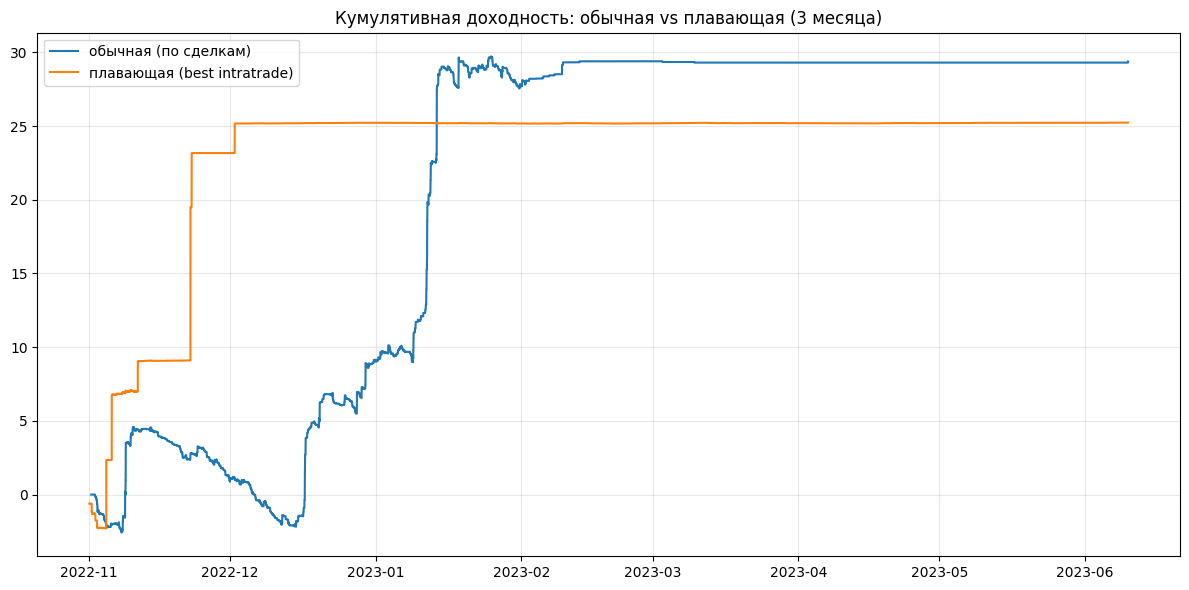

In [135]:
import pathlib as pl
import pandas as pd
import matplotlib.pyplot as plt

# 1) prepare trades
tr = prep_trades(df)

# 2) window: 3 months
START = pd.Timestamp("2022-11-01")
END   = pd.Timestamp("2023-02-01")  # end exclusive

tr3 = tr[(tr["entry_date"] >= START) & (tr["entry_date"] < END)].copy()
tr3 = tr3.reset_index(drop=True)

# 3) normal curve (by closed trades) — fix duplicates in exit_date
normal = (
    tr3.groupby("exit_date")["profit_eq_pc"]
       .sum()
       .sort_index()
       .cumsum()
)


# 4) price loader
DATA_DIR = pl.Path("/content/drive/MyDrive/ml_for_finmarkets_data")
_cache = {}

def load_pair(instrument: str) -> pd.DataFrame:
    fn = instrument.replace("-", "_") + ".parquet"
    path = DATA_DIR / fn
    if fn not in _cache:
        _cache[fn] = pd.read_parquet(path).sort_index()
    return _cache[fn]

# 5) floating curve (best intratrade on 15m bars)
cum_before = 0.0
parts = []

for r in tr3.itertuples(index=False):
    px = load_pair(r.instrument)
    bars = px.loc[r.entry_date:r.exit_date]
    if bars.empty:
        continue

    best = bars["high"] if r.direction == "Long" else bars["low"]

    if r.direction == "Long":
        pnl_abs = (best - r.entry_price) * r.volume - r.commission
    else:
        pnl_abs = (r.entry_price - best) * r.volume - r.commission

    pnl_eq_pc = pnl_abs / r.start_equity * 100.0
    parts.append(pd.Series(cum_before + pnl_eq_pc, index=bars.index))

    cum_before += r.profit_eq_pc

floating = pd.concat(parts).groupby(level=0).last().sort_index()

# 6) align & plot
normal_ff = normal.reindex(floating.index, method="ffill")

plt.figure(figsize=(12, 6))
plt.plot(normal_ff.index, normal_ff.values, label="обычная (по сделкам)")
plt.plot(floating.index, floating.values, label="плавающая (best intratrade)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.title("Кумулятивная доходность: обычная vs плавающая (3 месяца)")
plt.tight_layout()
plt.show()


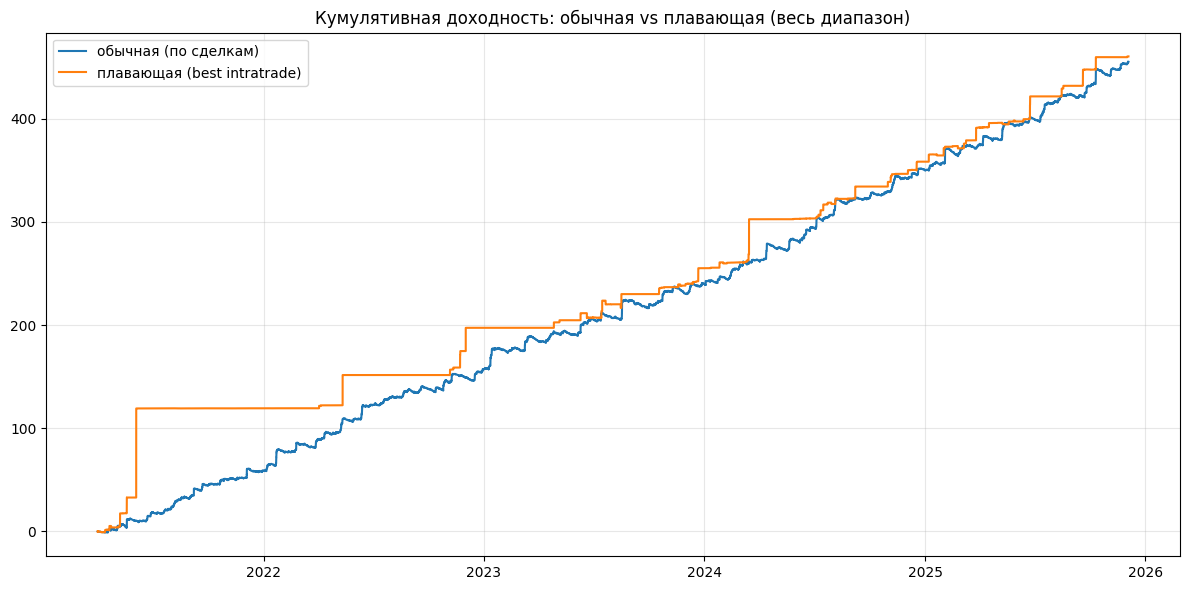

In [136]:
import pathlib as pl
import pandas as pd
import matplotlib.pyplot as plt

# 1) trades
tr = prep_trades(df).copy()
tr = tr.reset_index(drop=True)

# 2) full range
START = tr["entry_date"].min()
END   = tr["entry_date"].max()  # не используется дальше, но пусть будет понятно

# 3) normal curve (fix duplicate exit_date)
normal = (
    tr.groupby("exit_date")["profit_eq_pc"]
      .sum()
      .sort_index()
      .cumsum()
)

# 4) price loader
DATA_DIR = pl.Path("/content/drive/MyDrive/ml_for_finmarkets_data")
_cache = {}

def load_pair(instrument: str) -> pd.DataFrame:
    fn = instrument.replace("-", "_") + ".parquet"
    if fn not in _cache:
        _cache[fn] = pd.read_parquet(DATA_DIR / fn).sort_index()
    return _cache[fn]

# 5) floating curve
cum_before = 0.0
parts = []

for r in tr.itertuples(index=False):
    px = load_pair(r.instrument)
    bars = px.loc[r.entry_date:r.exit_date]
    if bars.empty:
        cum_before += r.profit_eq_pc
        continue

    best = bars["high"] if r.direction == "Long" else bars["low"]

    if r.direction == "Long":
        pnl_abs = (best - r.entry_price) * r.volume - r.commission
    else:
        pnl_abs = (r.entry_price - best) * r.volume - r.commission

    pnl_eq_pc = pnl_abs / r.start_equity * 100.0
    parts.append(pd.Series(cum_before + pnl_eq_pc, index=bars.index))

    cum_before += r.profit_eq_pc

floating = pd.concat(parts).groupby(level=0).last().sort_index()

# 6) align & plot
normal_ff = normal.reindex(floating.index, method="ffill")

plt.figure(figsize=(12, 6))
plt.plot(normal_ff.index, normal_ff.values, label="обычная (по сделкам)")
plt.plot(floating.index, floating.values, label="плавающая (best intratrade)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.title("Кумулятивная доходность: обычная vs плавающая (весь диапазон)")
plt.tight_layout()
plt.show()


Колонки trades: ['strategy_name', 'signal_type', 'instrument', 'timeframe', 'direction', 'entry_date', 'entry_price', 'stop_price', 'exit_date', 'exit_price', 'exit_type', 'volume', 'commission', 'profit_abs', 'profit_eq_pc', 'start_equity']


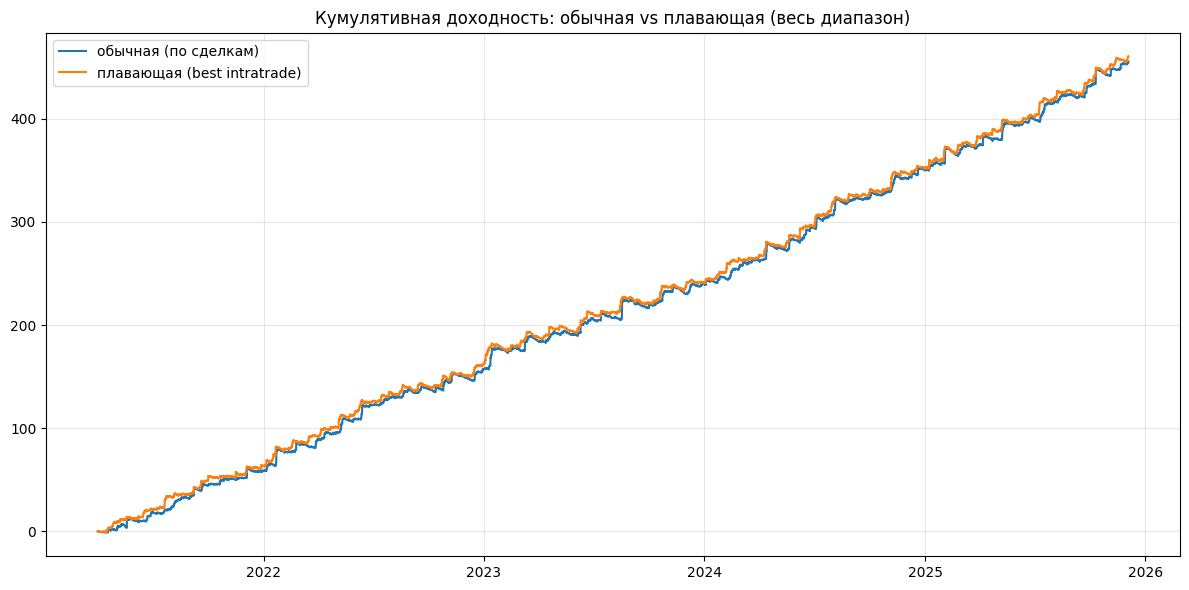

In [138]:
import pathlib as pl
import pandas as pd
import matplotlib.pyplot as plt

# --- paths ---
TRADES_CSV = "/content/drive/MyDrive/deals_all_opt.csv"
DATA_DIR   = pl.Path("/content/drive/MyDrive/ml_for_finmarkets_data")

# --- 1) load trades clean ---
tr = pd.read_csv(TRADES_CSV)

# гарантируем нужные колонки
if "exit_date" not in tr.columns and tr.index.name == "exit_date":
    tr = tr.reset_index()
if "entry_date" not in tr.columns and tr.index.name == "entry_date":
    tr = tr.reset_index()

# если в csv вдруг другие названия
if "exit_time" in tr.columns and "exit_date" not in tr.columns:
    tr = tr.rename(columns={"exit_time": "exit_date"})
if "entry_time" in tr.columns and "entry_date" not in tr.columns:
    tr = tr.rename(columns={"entry_time": "entry_date"})

# контроль: покажем, что реально есть
print("Колонки trades:", list(tr.columns))

# даты
tr["entry_date"] = pd.to_datetime(tr["entry_date"])
tr["exit_date"]  = pd.to_datetime(tr["exit_date"])
tr = tr.sort_values("entry_date").reset_index(drop=True)

# --- 2) normal curve (fix duplicates in exit_date) ---
normal = (
    tr.groupby("exit_date")["profit_eq_pc"]
      .sum()
      .sort_index()
      .cumsum()
)

# --- 3) loader ---
_cache = {}
def load_pair(instrument: str) -> pd.DataFrame:
    fn = instrument.replace("-", "_") + ".parquet"
    if fn not in _cache:
        _cache[fn] = pd.read_parquet(DATA_DIR / fn).sort_index()
    return _cache[fn]

# --- 4) floating curve ---
cum_before = 0.0
parts = []

for r in tr.itertuples(index=False):
    px = load_pair(r.instrument)
    bars = px.loc[r.entry_date:r.exit_date]
    if bars.empty:
        cum_before += r.profit_eq_pc
        continue

    best = bars["high"] if r.direction == "Long" else bars["low"]

    if r.direction == "Long":
        pnl_abs = (best - r.entry_price) * r.volume - r.commission
    else:
        pnl_abs = (r.entry_price - best) * r.volume - r.commission

    pnl_eq_pc = pnl_abs / r.start_equity * 100.0
    parts.append(pd.Series(cum_before + pnl_eq_pc, index=bars.index))

    cum_before += r.profit_eq_pc

floating = pd.concat(parts).groupby(level=0).last().sort_index()

# --- 5) align & plot ---
normal_ff = normal.reindex(floating.index, method="ffill")

plt.figure(figsize=(12, 6))
plt.plot(normal_ff.index, normal_ff.values, label="обычная (по сделкам)")
plt.plot(floating.index, floating.values, label="плавающая (best intratrade)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.title("Кумулятивная доходность: обычная vs плавающая (весь диапазон)")
plt.tight_layout()
plt.show()
